In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [2]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [3]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

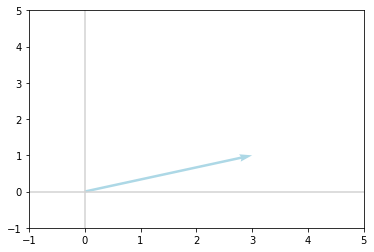

In [4]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [5]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [6]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [7]:
v == Iv

array([ True,  True])

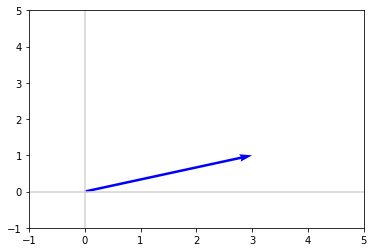

In [8]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [9]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [10]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

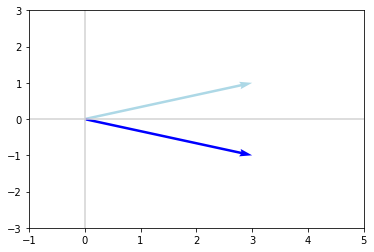

In [11]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [12]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [13]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

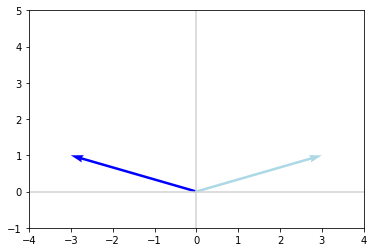

In [14]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

More generally, an affine transformation is an automorphism of an affine space (Euclidean spaces are specific affine spaces), that is, a function which maps an affine space onto itself while preserving both the dimension of any affine subspaces (meaning that <b>it sends points to points, lines to lines, planes to planes, and so on) and the ratios of the lengths of parallel line segments.</b> Consequently, sets of parallel affine subspaces remain parallel after an affine transformation. <b>An affine transformation does not necessarily preserve angles between lines or distances between points, though it does preserve ratios of distances between points lying on a straight line.</b>

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$: 

In [15]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [16]:
Av = np.dot(A, v)
Av

array([1, 4])

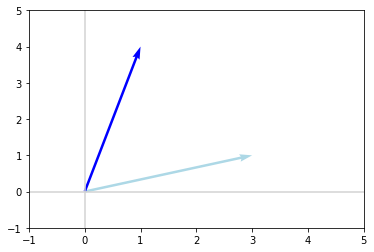

In [17]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

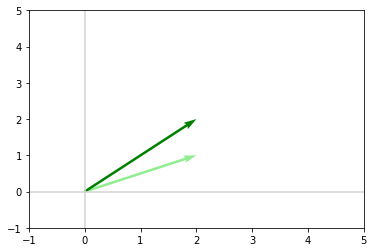

In [18]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector): 

In [19]:
v

array([3, 1])

In [20]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [21]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [22]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [23]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [24]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [25]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [26]:
vectorfy(V, 0)

array([3, 1])

In [27]:
vectorfy(V, 0) == v

array([ True,  True])

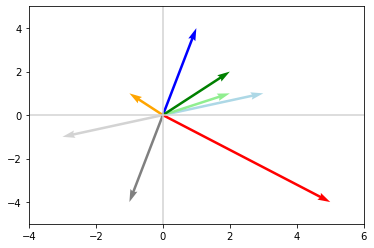

In [28]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

### Eigenvectors:
#### The vectors which do not change there axis after a multiplication operation is applied on them are know as Eigenvectors. For eg. For 2 matrices A and B, the vectors of A that do not change their direction or change their direction by 180 degrees are known as Eigenvectors of B.
#### An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

#### Note: Their length may differ after the multiplication operation but they remain on the same axis.

### Eigenvalues:
#### The number by which the Eigenvector's length gets scaled is known as the Eigenvalue. For eg. if the length of the Eigenvector gets doubled, the Eigenvalue is 2 and if it's length gets halved, the Eigenvalue is 0.5. <br>
The Eigenvalue also depends on the direction of the Eigenvector, if the vector has been flipped, the Eigenvalue is <b><u>Negative</u></b>.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

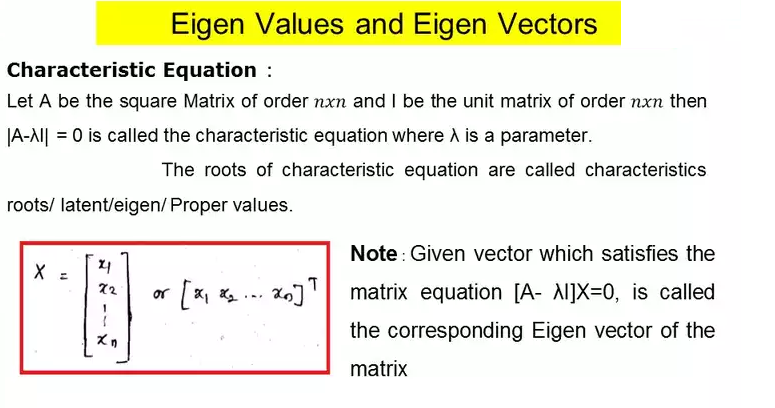
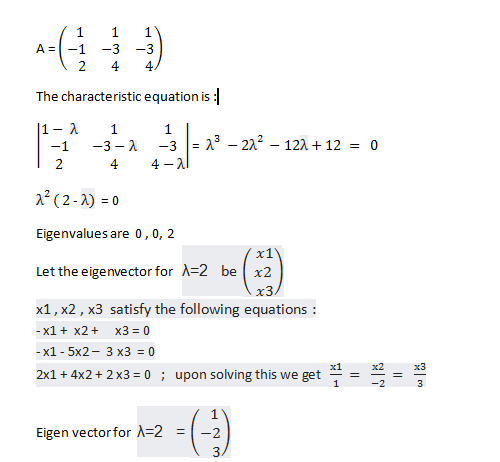

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Image Source: Google

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [29]:
X = np.array([[1, 1, 1], [-1, -3, -3], [2, 4, 4]])
X

array([[ 1,  1,  1],
       [-1, -3, -3],
       [ 2,  4,  4]])

In [30]:
lambdas, V = np.linalg.eig(X)

In [31]:
V # each column is a separate eigenvector v

array([[ 2.67261242e-01, -5.61496147e-09, -5.61496206e-09],
       [-5.34522484e-01, -7.07106778e-01,  7.07106784e-01],
       [ 8.01783726e-01,  7.07106784e-01, -7.07106778e-01]])

In [32]:
np.round(lambdas)

array([ 2.,  0., -0.])

In [33]:
v = V[:,0] 
v

array([ 0.26726124, -0.53452248,  0.80178373])

In [34]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.9999999999999998

In [35]:
Xv = np.dot(X, v)
Xv

array([ 0.53452248, -1.06904497,  1.60356745])

In [36]:
lambduh * v

array([ 0.53452248, -1.06904497,  1.60356745])

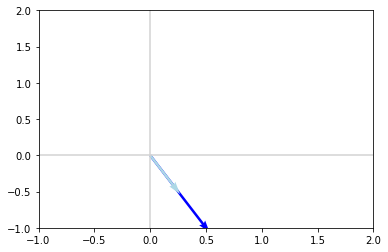

In [37]:
plot_vectors([Xv, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [38]:
A

array([[-1,  4],
       [ 2, -2]])

In [39]:
lambdas, V = np.linalg.eig(A) 

In [40]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [41]:
# The first column represents ([0.86, 0.51], [-0.76, 0.64]). 

In [42]:
lambdas

array([ 1.37228132, -4.37228132])

In [43]:
# 1.37 is the eigenvalue of eigenvector [0.86, 0.51], -4.37 is the eigenvalue of eigenvector [-0.76, 0.64].

In [44]:
v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [45]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [46]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [47]:
lambduh * v

array([1.18031462, 0.70000958])

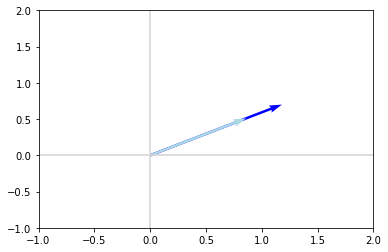

In [48]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

And again for the second eigenvector of A: 

In [49]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [50]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [51]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [52]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

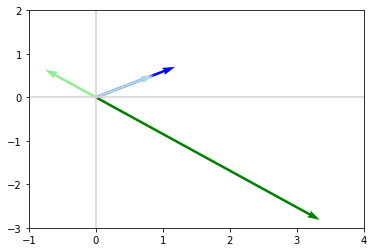

In [53]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using the PyTorch `eig()` method, we can do exactly the same: 

In [54]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [55]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [56]:
V_cplx # complex-typed values with "0.j" imaginary part are in fact real numbers

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [57]:
V_p = V_cplx.float()
V_p

C:\Users\DELL\AppData\Local\Temp/ipykernel_944/1096125134.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [58]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [59]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [60]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [61]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [62]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [63]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [64]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [65]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [66]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [67]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

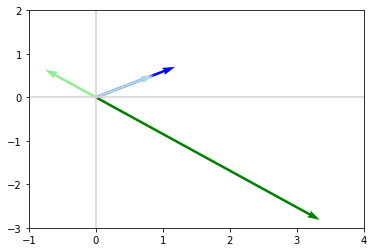

In [68]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows): 

In [69]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [70]:
lambdas_X, V_X = np.linalg.eig(X) 

In [71]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [72]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

Confirm $Xv = \lambda v$ for an example eigenvector: 

In [73]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [74]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948916

In [75]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [76]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

In [77]:
A_p = torch.tensor([[25, 2, 9], [5, 26, -5], [3, 7, -1.]]) # must be float for PyTorch eig()
A_p

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [78]:
lambdas_p, V_p = torch.linalg.eig(A_p) 

In [79]:
lambdas_p = lambdas_p.float()

In [80]:
lambdas_p

tensor([29.6762, 20.6212, -0.2974])

Confirm $Xv = \lambda v$ for an example eigenvector: (using pytorch)

In [81]:
v_p = V_p[:,0] 
v_p

tensor([0.7118+0.j, 0.6665+0.j, 0.2217+0.j])

In [82]:
v_p = v_p.float()
v_p

tensor([0.7118, 0.6665, 0.2217])

In [83]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([21.1223, 19.7798,  6.5792])

In [84]:
lambdas_p  = lambdas_p[0]

In [85]:
lambdas_p

tensor(29.6762)

In [86]:
lambdas_p * v_p 

tensor([21.1223, 19.7798,  6.5792])

Confirm $Xv = \lambda v$ for the rest of the Eigenvectos

In [87]:
v_x = V_X[:,1]
v_x

array([-0.6501921 ,  0.74464056,  0.15086635])

In [88]:
lambdas_x = lambdas_X[1]
lambdas_x

20.62117365053536

In [89]:
np.dot(X, v_x)

array([-13.40772428,  15.3553624 ,   3.11104129])

In [90]:
lambdas_x * v_x

array([-13.40772428,  15.3553624 ,   3.11104129])

In [91]:
v_x = V_X[:, 2]
v_x

array([-0.34220476,  0.23789717,  0.90901091])

In [92]:
lambdas_x = lambdas_X[2]
lambdas_x

-0.29740567448426625

In [93]:
np.dot(X, v_x)

array([ 0.10177364, -0.07075197, -0.270345  ])

In [94]:
lambdas_x * v_x

array([ 0.10177364, -0.07075197, -0.270345  ])